In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Entropy 의 값에 따른 자료특성 변화

In [2]:
#my_url= "April_sensor_data.csv"
my_url= "April_All.csv"
#data frame
df = pd.read_csv(my_url, parse_dates=['REG_DATE'])

In [3]:
# index 컬럼 지정 
df = df.set_index("NO", drop = True)

df['weekday'] = df['REG_DATE'].dt.day_name()
print(df.columns)

Index(['REG_DATE', 'PM2.5', 'PM10.0', 'Temperature', 'Huminity', 'TVOC', 'CO2',
       'weekday'],
      dtype='object')


In [4]:
df_monday = df[df['weekday']=='Monday']
df_tuesday = df[df['weekday']=='Tuesday']
df_wednesday = df[df['weekday']=='Wednesday']
df_thursday = df[df['weekday']=='Thursday']
df_friday = df[df['weekday']=='Friday']

df_saturday = df[df['weekday']=='Saturday']
df_sunday = df[df['weekday']=='Sunday']


df_workday = pd.concat([df_monday,df_tuesday, df_wednesday, df_thursday, df_friday])
#df_weekend = pd.concat([df_saturday,df_sunday])
df_weekend = pd.concat([df_saturday])


In [5]:
df_workday.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
count,25291.000000,25291.000000,25289.000000,25289.000000,25290.000000,25290.000000
mean,12.094452,12.138252,19.974839,26.335778,1.896103,4.567800
std,7.842068,7.620814,1.168353,5.861616,0.443588,1.154949
min,1.020000,1.020000,17.000000,15.000000,0.670000,2.150000
25%,5.860000,6.190000,19.100000,22.500000,1.580000,3.760000
50%,11.030000,12.380000,19.800000,24.900000,1.970000,4.320000
75%,15.670000,16.390000,20.700000,28.600000,2.150000,5.017500
max,74.570000,61.900000,25.200000,44.100000,8.880000,8.310000


In [6]:
df_weekend.describe()

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
count,5760.000000,5760.000000,5759.000000,5759.000000,5760.00000,5760.000000
mean,12.643045,12.663531,20.124032,31.119934,1.90245,5.457269
std,9.416471,8.453577,0.809776,6.581850,0.25640,1.319640
min,1.480000,0.000000,18.600000,14.800000,1.40000,2.280000
25%,6.440000,6.220000,19.500000,29.100000,1.75000,4.910000
50%,10.755000,12.380000,20.100000,30.800000,1.90000,5.180000
75%,14.800000,14.525000,20.700000,36.000000,2.04000,6.425000
max,67.030000,55.710000,22.000000,43.100000,2.47000,8.020000


In [7]:
df_workday.head()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,weekday
NO,,,,,,,,
5761,2020-04-06 00:00:00,7.83,6.19,19.1,23.8,1.95,3.92,Monday
5762,2020-04-06 00:01:00,7.83,6.19,19.1,23.8,1.94,3.89,Monday
5763,2020-04-06 00:02:00,8.12,6.19,19.1,23.9,1.92,3.92,Monday
5764,2020-04-06 00:03:00,10.16,12.38,19.1,23.8,1.91,3.91,Monday
5765,2020-04-06 00:04:00,11.90,12.38,19.1,23.9,1.93,3.95,Monday


### group by a single column
df.groupby('column1')

In [8]:
df.groupby('weekday')

In [9]:
week_df = df.groupby(df['weekday']).mean()

In [10]:
week_df

,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2
weekday,,,,,,
Friday,14.199453,13.837120,20.468918,29.021688,2.083778,5.217681
Monday,8.767100,8.981487,19.778990,29.293101,1.854292,5.051125
Saturday,12.643045,12.663531,20.124032,31.119934,1.902450,5.457269
Sunday,10.204038,10.146889,19.769670,28.733594,1.699844,4.927045
Thursday,12.786047,12.810311,20.276558,22.996788,1.871736,4.025123
Tuesday,10.583877,10.766368,19.780486,28.220787,1.956965,4.827870
Wednesday,13.828231,14.098289,19.340926,21.808889,1.667148,3.590845


In [11]:
df.groupby('weekday').groups

{'Friday': Int64Index([ 1441,  1442,  1443,  1444,  1445,  1446,  1447,  1448,  1449,
              1450,
             ...
             33111, 33112, 33113, 33114, 33115, 33116, 33117, 33118, 33119,
             33120],
            dtype='int64', name='NO', length=5760),
 'Monday': Int64Index([ 5761,  5762,  5763,  5764,  5765,  5766,  5767,  5768,  5769,
              5770,
             ...
             36802, 36803, 36804, 36805, 36806, 36807, 36808, 36809, 36810,
             36811],
            dtype='int64', name='NO', length=5131),
 'Saturday': Int64Index([ 2881,  2882,  2883,  2884,  2885,  2886,  2887,  2888,  2889,
              2890,
             ...
             34551, 34552, 34553, 34554, 34555, 34556, 34557, 34558, 34559,
             34560],
            dtype='int64', name='NO', length=5760),
 'Sunday': Int64Index([ 4321,  4322,  4323,  4324,  4325,  4326,  4327,  4328,  4329,
              4330,
             ...
             35991, 35992, 35993, 35994, 35995, 35996, 3599

In [12]:
def grouping(week):
    if week in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 'Group1'
    else:
        return 'Group2'


In [13]:
grouping('Sunday')

'Group2'

In [14]:
df_group = df.groupby(grouping).groups

In [15]:
df_group = df.groupby('weekday')

In [16]:
#df_group.get_group('Saturday')

MT = pd.merge(df[df['weekday']=='Monday'], df[df['weekday']=='Tuesday'])

In [17]:
MT.head()

,REG_DATE,PM2.5,PM10.0,Temperature,Huminity,TVOC,CO2,weekday


In [18]:
len(df_group)

7

In [19]:
friday_url= "friday.csv"
sunday_url ="sunday.csv" 
df_friday = pd.read_csv(friday_url, parse_dates=['REG_DATE'])
df_sunday = pd.read_csv(sunday_url, parse_dates=['REG_DATE'])

# index 컬럼 지정 
df_friday = df_friday.set_index("NO", drop = True)
df_sunday = df_sunday.set_index("NO", drop = True)



In [20]:
df_workday = df_workday.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [21]:
df_weekend = df_weekend.rename(columns={'Huminity': 'Humidity', 'PM2.5' :'PM25', 'PM10.0':'PM100'})

In [22]:
df_weekend.columns

Index(['REG_DATE', 'PM25', 'PM100', 'Temperature', 'Humidity', 'TVOC', 'CO2',
       'weekday'],
      dtype='object')

Text(0.5, 1.0, 'Sunday Humidity')

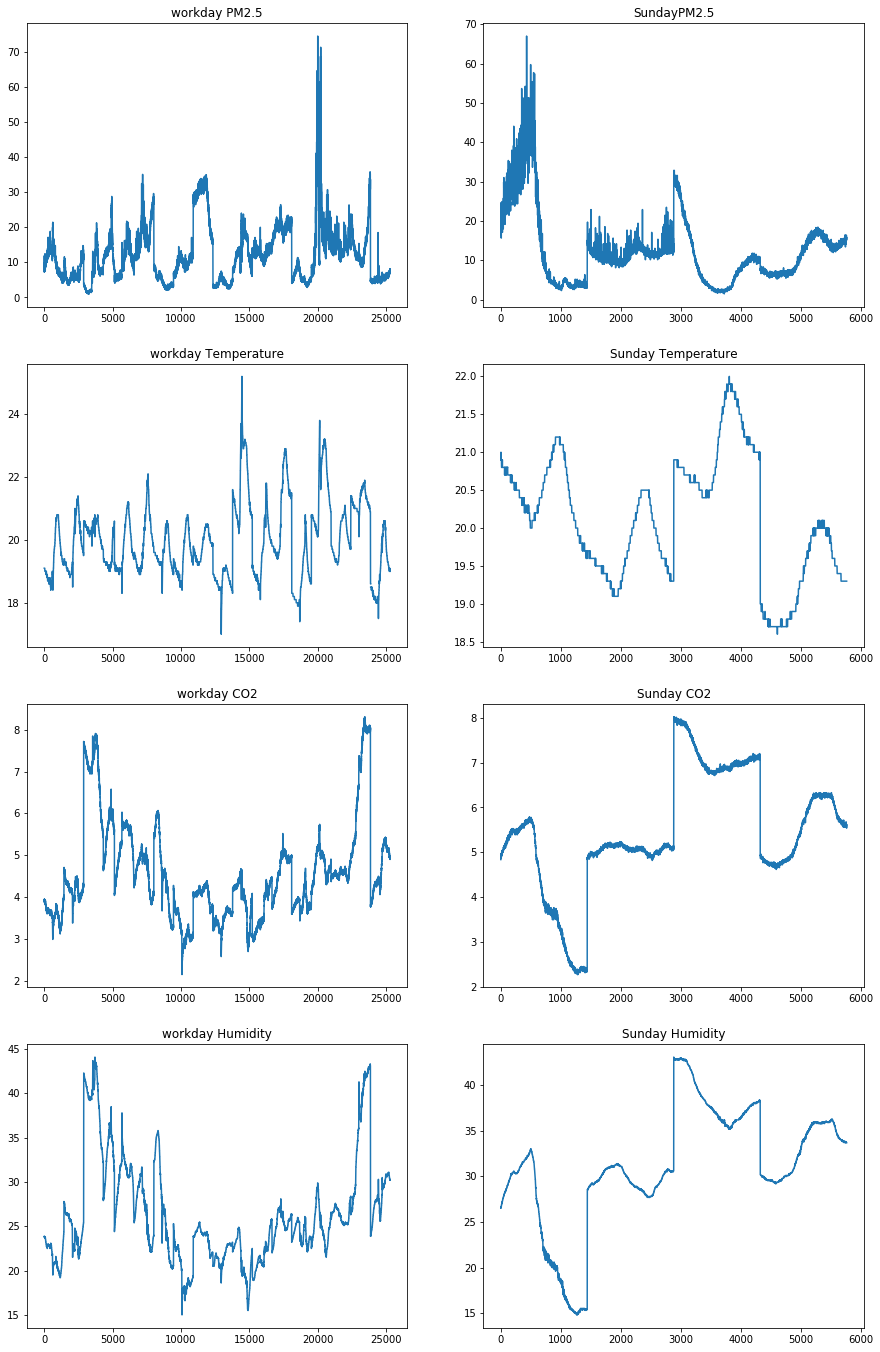

In [23]:
fig, axes = plt.subplots(4,2, figsize=(15,24))
x  = list(range(len(df_workday['PM25'])))
axes[0][0].plot(x, df_workday['PM25'])
axes[0][0].set_title ('workday PM2.5')

x1  = list(range(len(df_weekend['PM25'])))
axes[0][1].plot(x1, df_weekend['PM25'])
axes[0][1].set_title ('SundayPM2.5') 


axes[1][0].plot(x, df_workday['Temperature'])
axes[1][0].set_title ('workday Temperature')

axes[1][1].plot(x1, df_weekend['Temperature'])
axes[1][1].set_title ('Sunday Temperature') 

axes[2][0].plot(x, df_workday['CO2'])
axes[2][0].set_title ('workday CO2')

axes[2][1].plot(x1, df_weekend['CO2'])
axes[2][1].set_title ('Sunday CO2') 

axes[3][0].plot(x, df_workday['Humidity'])
axes[3][0].set_title ('workday Humidity')

axes[3][1].plot(x1, df_weekend['Humidity'])
axes[3][1].set_title ('Sunday Humidity') 
